# Math functions defined recursively

## Factorial

In [1]:
def fact(n):
    if n==0: return 1
    return n * fact(n-1)

In [11]:
for i in range(12): print(f"{i}: {fact(i)}")

0: 1
1: 1
2: 2
3: 6
4: 24
5: 120
6: 720
7: 5040
8: 40320
9: 362880
10: 3628800
11: 39916800


In [13]:
def factloop(n):
    r = 1
    for i in range(1,n+1):
        r *= i
    return r

In [14]:
for i in range(12): print(f"{i}: {factloop(i)}")

0: 1
1: 1
2: 2
3: 6
4: 24
5: 120
6: 720
7: 5040
8: 40320
9: 362880
10: 3628800
11: 39916800


## Fibonacci

In [8]:
def fib(n):
    if n==0 or n==1: return 1
    return fib(n-1) + fib(n-2)

In [12]:
for i in range(12): print(f"{i}: {fib(i)}")

0: 1
1: 1
2: 2
3: 3
4: 5
5: 8
6: 13
7: 21
8: 34
9: 55
10: 89
11: 144


In [32]:
%timeit -r 1 -n 1 fib(37)

16.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [38]:
def cachefib(n):
    F = [0 for i in range(n+1)]
    F[0] = F[1] = 1
    # work up not down
    for i in range(2,n+1): 
        F[i] = F[i-1] + F[i-2]
    return F[n]    

In [37]:
%timeit -r 1 -n 1 cachefib(1000)

342 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Binary search

In [55]:
def binsearch(a,x):
    left = 0; right = len(a)-1
    while left<=right:    
        mid = int((left + right)/2)
        if a[mid]==x: return mid 
        if x < a[mid]: right = mid-1
        else: left = mid+1
    return -1

In [56]:
binsearch(range(10), 333)

-1

In [65]:
def binsearch(a,x,left,right):
    print(left, right)
    if left > right: return -1
    mid = int((left + right)/2)
    if a[mid]==x: return mid 
    if x < a[mid]:
        return binsearch(a,x,left,mid-1)
    else:
        return binsearch(a,x,mid+1,right)

a = range(10)
n = len(a)
binsearch(a,5,0,n-1)

0 9
5 9
5 6


5

# Tree walking

## Construcing Binary Search Tree

In [22]:
class TreeNode:
  def __init__(self, value, left=None, right=None):
    self.value = value
    self.left = left
    self.right = right
    
def add(p:TreeNode, value) -> None:
    "add nodes like a binary search tree"
    if value < p.value:
        if p.left is not None: add(p.left, value)
        else: p.left = TreeNode(value)
    if value > p.value:
        if p.right is not None: add(p.right, value)
        else: p.right = TreeNode(value)
    # do nothing if equal (already there)

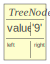

In [9]:
from lolviz import *
root = TreeNode(9)
treeviz(root)

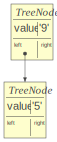

In [10]:
add(root, 5)
treeviz(root)

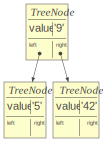

In [11]:
add(root, 42)
treeviz(root)

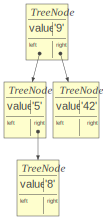

In [12]:
add(root, 8)
treeviz(root)

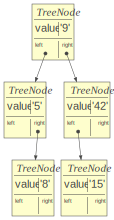

In [13]:
add(root, 15)
treeviz(root)

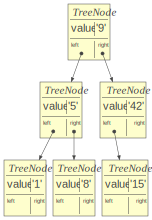

In [16]:
add(root, 1)
treeviz(root)

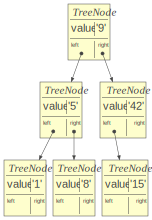

In [18]:
add(root, 5) # already there
treeviz(root)

## Walking binary tree

In [21]:
def walk_tree(p:TreeNode) -> None:
    if p is None: return
    print(p.value) # "visit" node in preorder traversal position
    walk_tree(p.left)
    walk_tree(p.right)

In [19]:
walk_tree(root)

9
5
1
8
42
15


# Walk graph

In [40]:
class Node:
  def __init__(self, value):
    self.value = value
    self.edges = [] # outgoing edges
  def add(self, target:Node):
    self.edges.append(target)

In [41]:
sf = Node("SF")
la = Node("LA")
sac = Node("Sacramento")
oak = Node("Oakland")
baker = Node("Bakersfield")
sj = Node("San Jose")
sf.add(sj)
sj.add(baker)
sf.add(oak)
oak.add(sac)
sac.add(baker)
baker.add(la)
objviz(sf).view()

'Source.gv.pdf'

In [38]:
def walk_graph(p:Node) -> None:
    if p is None: return
    print(p.value) # "visit" node in preorder traversal position
    for q in p.edges:
        walk_graph(q)

In [39]:
walk_graph(sf)

SF
San Jose
Bakersfield
LA
Oakland
Sacramento
Bakersfield
LA
